In [85]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from konlpy.tag import Twitter
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [86]:
# 한글 깨짐
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [87]:
from konlpy.tag import Kkma

In [184]:
train_raw = pd.read_csv('train.csv',encoding = 'utf-8')
test_raw = pd.read_csv('test.csv',encoding = 'utf-8')
train = train_raw
test = test_raw

In [185]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [186]:
func = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'

def text_preprocessing(x):
    func = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
    a = re.sub("\\(.*?\\)",'',str(x)) #()안에 문자 제거
    a = re.sub(func, "", a)
    a = re.sub("[0-9]", "", a)
    a = a.replace("\\n", "")

    return a

def comment_preprocessing(x):
#    twitter = Twitter()
    a = kkma.nouns(x)
    a = " ".join(a)
    return a

#이미 명사형태이므로 형태소 분석기의 nouns()함수를 통해서 명사를 추출하면 메뉴가 너무 잘게 쪼개져 의미가 퇴색되는 듯 보인다.
#ex) 쇠불고기 > 쇠+불고기 / 유산슬 > 유+산+슬
#또한, 동일한 메뉴의 메뉴명이 바뀌지 않는다고 가정한다면 생소한 메뉴여도 count될 것이므로 nouns로 쪼개지 않는 것이 나아보임.

In [237]:
train["중식메뉴"] = train["중식메뉴"].apply(lambda x: text_preprocessing(x))
#train["중식메뉴"] = train["중식메뉴"].apply(lambda x: comment_preprocessing(x))
#train['중식메뉴']

In [238]:
train['중식메뉴']

0            쌀밥잡곡밥  오징어찌개  쇠불고기  계란찜  청포묵무침  요구르트  포기김치  
1       쌀밥잡곡밥  김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이  
2           카레덮밥  팽이장국  치킨핑거  쫄면야채무침  견과류조림  요구르트  포기김치  
3           쌀밥잡곡밥  쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치  
4            쌀밥잡곡밥  떡국  돈육씨앗강정  우엉잡채  청경채무침  요구르트  포기김치  
                              ...                        
1200    쌀밥흑미밥찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치 양...
1201     쌀밥수수밥찰현미밥 냉이된장국 동파육 봄동전 청경채버섯숙회초장 무생채 양상추샐러드파인D 
1202    전주비빔밥약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러드...
1203    쌀밥흑미밥찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부달래양념장 봄동겉절...
1204    쌀밥귀리밥찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치요구...
Name: 중식메뉴, Length: 1205, dtype: object

In [239]:
lunch_menu = {}

for sentence in train['중식메뉴']:
    lst = sentence.split(" ")
    for text in lst:
        lunch_menu[text] = words.get(text, 0) + 1 #딕셔너리에 속한 값들 빈도수 세기
        
#lunch_count = Counter(lunch_menu)
#lunch_count

In [240]:
del lunch_menu['']

In [243]:
lmenu_tk = list(lunch_menu.keys())
lcount_tk = list(lunch_menu.values())

In [244]:
lmenu_df = pd.DataFrame(lmenu_tk)
lmenu_df.columns = ['menu']
lcount_df = pd.DataFrame(lcount_tk)
lcount_df.columns = ['count']
lunch_df = pd.concat([lmenu_df,lcount_df],axis =1)
#lunch_df.index = lunch_df['menu']
#lunch_df = lunch_df.drop(['menu'],axis = 1)
lunch_df

,menu,count
0,쌀밥잡곡밥,1
1,오징어찌개,2
2,쇠불고기,5
3,계란찜,25
4,청포묵무침,7
...,...,...
1674,전주식콩나물해장국,2
1675,연두부달래양념장,1
1676,봄동겉절이양념김,1
1677,교촌간장치킨,2


In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [220]:
lunch_cluster = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
lunch_cluster.fit_predict(lunch_df)

array([2, 2, 2, ..., 2, 2, 2])

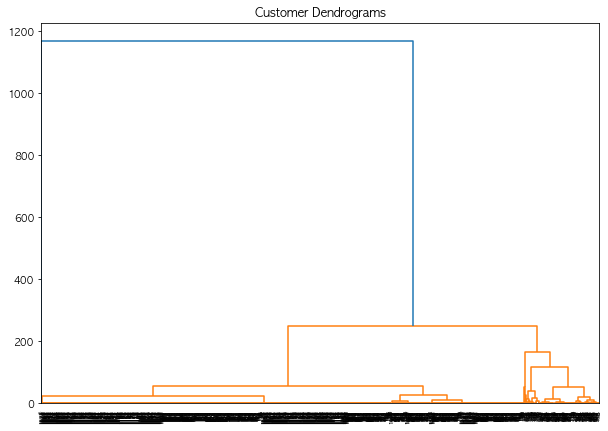

In [221]:
# 덴드로그램 작성하기
plt.figure(figsize = (10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(lunch_df, method = "ward"))
plt.show()

In [230]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 2000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

In [ ]:
detokenized_doc = []
for i in range(len()):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

In [231]:
X = vectorizer.fit_transform(train['중식메뉴'])
X.shape # TF-IDF 행렬의 크기 확인

(1205, 1676)

In [235]:
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

10

In [236]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('배추겉절이', 0.35315), ('콩나물국', 0.21619), ('열무김치', 0.19496), ('알타리김치', 0.18532), ('깍두기', 0.16551)]
Topic 2: [('배추겉절이', 0.47144), ('맑은국', 0.32745), ('카레덮밥', 0.16805), ('가쯔오장국', 0.12065), ('오이무침', 0.11719)]
Topic 3: [('맑은국', 0.41875), ('오이무침', 0.343), ('카레덮밥', 0.24844), ('콩나물국', 0.22747), ('파스타샐러드', 0.16238)]
Topic 4: [('버섯불고기', 0.38521), ('배추겉절이', 0.34182), ('콩나물국', 0.23318), ('고추장찌개', 0.18698), ('오이무침', 0.11657)]
Topic 5: [('훈제오리구이', 0.47862), ('배추된장국', 0.21299), ('쌈무부추생채', 0.19543), ('열무김치', 0.15864), ('열무된장국', 0.15638)]
Topic 6: [('콩나물국', 0.50578), ('훈제오리구이', 0.20892), ('깍두기', 0.17751), ('배추겉절이', 0.17129), ('짬뽕불고기', 0.17058)]
Topic 7: [('버섯불고기', 0.32717), ('훈제오리구이', 0.25589), ('고추장찌개', 0.21912), ('계란말이', 0.21701), ('열무김치', 0.15074)]
Topic 8: [('오징어볶음', 0.35041), ('닭갈비', 0.34001), ('쇠고기샤브국', 0.24508), ('열무김치', 0.21426), ('무생채', 0.1393)]
Topic 9: [('닭갈비', 0.37929), ('깍두기', 0.368), ('배추된장국', 0.18934), ('콩나물무침', 0.15929), ('제육볶음', 0.1264)]
Topic 10: [('닭갈비', 0.35061), ('어묵국', 0.27

In [ ]:
from sklearn.datasets import fetch_20newsgroups
# LDA는 빈도수에만 기반하는 CountVectorizer사용함!
# CountVectorizer로 텍스트 데이터들 단어 빈도수에 기반해 벡터화시키기(fit_transform까지!)
count_vect = CountVectorizer(max_df=0.95, max_features=1000,
                            min_df=2, stop_words='english',
                            ngram_range=(1,2))
ftr_vect = count_vect.fit_transform(news_df.data)
# LDA클래스를 이용해서 피처 벡터화시킨 것을 토픽모델링 시키기
# 8개의 주제만 뽑았으니 n_components(토픽개수) 8로 설정
lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda.fit(ftr_vect)
# components_속성은 8개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)

In [249]:
lunch_df = pd.DataFrame(train['중식메뉴'])
lunch_df

,중식메뉴
0,쌀밥잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치
1,쌀밥잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이
2,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치
3,쌀밥잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치
4,쌀밥잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치
...,...
1200,쌀밥흑미밥찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치 양...
1201,쌀밥수수밥찰현미밥 냉이된장국 동파육 봄동전 청경채버섯숙회초장 무생채 양상추샐러드파인D
1202,전주비빔밥약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러드...
1203,쌀밥흑미밥찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부달래양념장 봄동겉절...


In [252]:
#stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = lunch_df['중식메뉴'].apply(lambda x: x.split()) # 토큰화
#tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [253]:
print(tokenized_doc[1])

['쌀밥잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이']


In [255]:
detokenized_doc = []
for i in range(len(lunch_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

lunch_df['중식메뉴'] = detokenized_doc

In [256]:
lunch_df['중식메뉴'][1]

'쌀밥잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이'

In [259]:
vectorizer = TfidfVectorizer(
max_features= 2000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(lunch_df['중식메뉴'])
X.shape # TF-IDF 행렬의 크기 확인

(1205, 1676)

In [260]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(2, 1), (4, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [261]:
print(dictionary[2])

쌀밥잡곡밥


In [262]:
len(dictionary)

1679

In [ ]:
#pip install pyLDAvis

In [277]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.059*"쌀밥잡곡밥" + 0.059*"포기김치" + 0.019*"쌀밥흑미밥찰현미밥" + 0.015*"배추겉절이"')
(1, '0.135*"쌀밥잡곡밥" + 0.121*"포기김치" + 0.008*"콩나물국" + 0.008*"된장찌개"')
(2, '0.093*"포기김치" + 0.076*"쌀밥잡곡밥" + 0.014*"맑은국" + 0.012*"열무김치"')
(3, '0.057*"쌀밥잡곡밥" + 0.028*"포기김치" + 0.018*"배추겉절이" + 0.013*"부대찌개"')


In [278]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [279]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.9043,"[(0, 0.03180503), (1, 0.9043225), (2, 0.032407..."
1,1,3.0,0.5581,"[(0, 0.031920366), (1, 0.37576136), (2, 0.0341..."
2,2,2.0,0.9051,"[(0, 0.031640027), (1, 0.031854738), (2, 0.905..."
3,3,2.0,0.9027,"[(0, 0.032088313), (1, 0.03367071), (2, 0.9026..."
4,4,1.0,0.6967,"[(0, 0.031758208), (1, 0.6967047), (2, 0.03287..."
5,5,2.0,0.9037,"[(0, 0.032031395), (1, 0.032688826), (2, 0.903..."
6,6,1.0,0.9039,"[(0, 0.031511802), (1, 0.90385914), (2, 0.0329..."
7,7,1.0,0.4794,"[(0, 0.45519343), (1, 0.47941902), (2, 0.03384..."
8,8,2.0,0.8992,"[(0, 0.032781392), (1, 0.03566303), (2, 0.8992..."
9,9,1.0,0.9040,"[(0, 0.031643312), (1, 0.9040083), (2, 0.03290..."


In [281]:
topictable

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.9043,"[(0, 0.03180503), (1, 0.9043225), (2, 0.032407..."
1,1,3.0,0.5581,"[(0, 0.031920366), (1, 0.37576136), (2, 0.0341..."
2,2,2.0,0.9051,"[(0, 0.031640027), (1, 0.031854738), (2, 0.905..."
3,3,2.0,0.9027,"[(0, 0.032088313), (1, 0.03367071), (2, 0.9026..."
4,4,1.0,0.6967,"[(0, 0.031758208), (1, 0.6967047), (2, 0.03287..."
...,...,...,...,...
1200,1200,1.0,0.8964,"[(0, 0.0376003), (1, 0.8963504), (2, 0.0324177..."
1201,1201,2.0,0.9029,"[(0, 0.031391524), (1, 0.034164254), (2, 0.902..."
1202,1202,1.0,0.9024,"[(0, 0.033084515), (1, 0.90236634), (2, 0.0331..."
1203,1203,2.0,0.9046,"[(0, 0.03191814), (1, 0.03184761), (2, 0.90461..."


In [283]:
ldamodel.print_topics()

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.059*"쌀밥잡곡밥" + 0.059*"포기김치" + 0.019*"쌀밥흑미밥찰현미밥" + 0.015*"배추겉절이" + 0.012*"미소장국" + 0.011*"콩나물무침" + 0.010*"열무김치" + 0.009*"깍두기" + 0.009*"나물비빔밥" + 0.007*"알타리김치"'),
 (1,
  '0.135*"쌀밥잡곡밥" + 0.121*"포기김치" + 0.008*"콩나물국" + 0.008*"된장찌개" + 0.007*"깍두기" + 0.007*"알타리김치" + 0.007*"닭갈비" + 0.007*"버섯불고기" + 0.007*"오징어볶음" + 0.007*"배추겉절이"'),
 (2,
  '0.093*"포기김치" + 0.076*"쌀밥잡곡밥" + 0.014*"맑은국" + 0.012*"열무김치" + 0.011*"훈제오리구이" + 0.011*"배추겉절이" + 0.009*"쌀밥흑미밥찰현미밥" + 0.009*"가쯔오장국" + 0.008*"카레덮밥" + 0.007*"오이무침"'),
 (3,
  '0.057*"쌀밥잡곡밥" + 0.028*"포기김치" + 0.018*"배추겉절이" + 0.013*"부대찌개" + 0.013*"열무김치" + 0.010*"쌀밥흑미밥찰현미밥" + 0.009*"매운돼지갈비찜" + 0.008*"메추리알조림" + 0.008*"콩나물국" + 0.008*"된장찌개"')]

In [294]:
pd.DataFrame(topictable)

/Users/doyeonpyun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.9043,"[(0, 0.03180503), (1, 0.9043225), (2, 0.032407..."
1,1,3.0,0.5581,"[(0, 0.031920366), (1, 0.37576136), (2, 0.0341..."
2,2,2.0,0.9051,"[(0, 0.031640027), (1, 0.031854738), (2, 0.905..."
3,3,2.0,0.9027,"[(0, 0.032088313), (1, 0.03367071), (2, 0.9026..."
4,4,1.0,0.6967,"[(0, 0.031758208), (1, 0.6967047), (2, 0.03287..."
...,...,...,...,...
1200,1200,1.0,0.8964,"[(0, 0.0376003), (1, 0.8963504), (2, 0.0324177..."
1201,1201,2.0,0.9029,"[(0, 0.031391524), (1, 0.034164254), (2, 0.902..."
1202,1202,1.0,0.9024,"[(0, 0.033084515), (1, 0.90236634), (2, 0.0331..."
1203,1203,2.0,0.9046,"[(0, 0.03191814), (1, 0.03184761), (2, 0.90461..."
